<a href="https://colab.research.google.com/github/Shreyashchawda12/Deep_Learning_ANN/blob/main/ANN_PRACTICAL1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

# New Section

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer ## HAndling Missing Values
from sklearn.preprocessing import StandardScaler # HAndling Feature Scaling
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [6]:
df = pd.read_csv("https://github.com/Shreyashchawda12/Datasets/raw/main/clean_data.csv")

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [7]:
x = df.iloc[:,:19]
y = df.iloc[:,-1:]

In [9]:
# Define which columns should be ordinal-encoded and which should be scaled
categorical_cols = x.select_dtypes(include='object').columns
numerical_cols = x.select_dtypes(exclude='object').columns

In [10]:
categorical_cols

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [11]:
numerical_cols

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [12]:
## Numerical Pipeline
num_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())

    ]

)

# Categorigal Pipeline
cat_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('OneHotEncoder',OneHotEncoder(categories='auto'))
    ]

)

preprocessor=ColumnTransformer([
('num_pipeline',num_pipeline,numerical_cols),
('cat_pipeline',cat_pipeline,categorical_cols)
])

In [13]:
preprocessor

ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                ('cat_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('OneHotEncoder',
                                                  OneHotEncoder())]),
                                 Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])

In [104]:
## Train test split

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=30)

In [105]:
x_train=pd.DataFrame(preprocessor.fit_transform(x_train),columns=preprocessor.get_feature_names_out())
x_test=pd.DataFrame(preprocessor.transform(x_test),columns=preprocessor.get_feature_names_out())

In [106]:
# create ANN


In [107]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [143]:
### lets initialize ANN
classifier = Sequential()

In [144]:
## Adding input
classifier.add(Dense(units=20,activation="sigmoid",input_dim=45))

In [145]:
## Adding first hidden layer
classifier.add(Dense(units=10,activation="sigmoid"))
classifier.add(Dropout(0.20))

In [146]:
## Adding second hidden layer
classifier.add(Dense(units=5,activation="sigmoid"))
classifier.add(Dropout(0.20))

In [147]:
## Adding third hidden layer
classifier.add(Dense(units=2,activation="sigmoid"))
classifier.add(Dropout(0.20))

In [148]:
## Adding output layer
classifier.add(Dense(units=1,activation="sigmoid"))

In [149]:
classifier.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 20)                920       
                                                                 
 dense_21 (Dense)            (None, 10)                210       
                                                                 
 dropout_12 (Dropout)        (None, 10)                0         
                                                                 
 dense_22 (Dense)            (None, 5)                 55        
                                                                 
 dropout_13 (Dropout)        (None, 5)                 0         
                                                                 
 dense_23 (Dense)            (None, 2)                 12        
                                                                 
 dropout_14 (Dropout)        (None, 2)                

In [150]:
classifier.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [151]:
import tensorflow
tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [152]:
## Early stopping
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=0,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)


In [153]:
model_history = classifier.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)


Epoch 1/1000
331/331 [==============================] - 4s 7ms/step - loss: 0.6457 - accuracy: 0.6243 - val_loss: 0.5847 - val_accuracy: 0.7449
Epoch 2/1000
331/331 [==============================] - 2s 6ms/step - loss: 0.5905 - accuracy: 0.7287 - val_loss: 0.5659 - val_accuracy: 0.7449
Epoch 3/1000
331/331 [==============================] - 2s 8ms/step - loss: 0.5687 - accuracy: 0.7442 - val_loss: 0.5444 - val_accuracy: 0.7449
Epoch 4/1000
331/331 [==============================] - 2s 5ms/step - loss: 0.5450 - accuracy: 0.7457 - val_loss: 0.5159 - val_accuracy: 0.7449
Epoch 5/1000
331/331 [==============================] - 2s 5ms/step - loss: 0.5206 - accuracy: 0.7457 - val_loss: 0.4928 - val_accuracy: 0.7449
Epoch 6/1000
331/331 [==============================] - 2s 5ms/step - loss: 0.5036 - accuracy: 0.7472 - val_loss: 0.4801 - val_accuracy: 0.7449
Epoch 7/1000
331/331 [==============================] - 2s 5ms/step - loss: 0.4982 - accuracy: 0.7478 - val_loss: 0.4730 - val_accuracy:

In [154]:
model_history.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

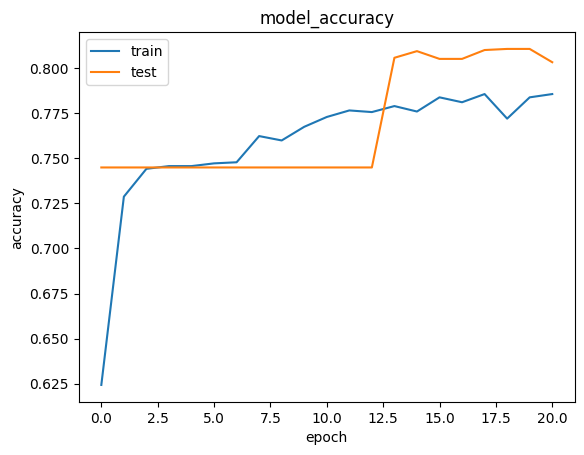

In [155]:
plt.plot(model_history.history["accuracy"])
plt.plot(model_history.history["val_accuracy"])
plt.title("model_accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(["train","test"],loc="upper left")
plt.show()

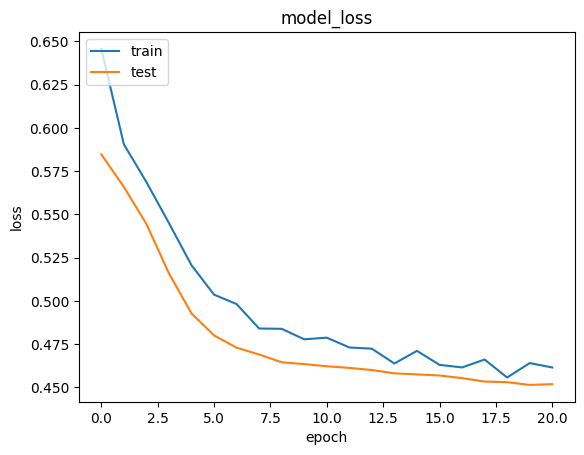

In [156]:
plt.plot(model_history.history["loss"])
plt.plot(model_history.history["val_loss"])
plt.title("model_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["train","test"],loc="upper left")
plt.show()

In [157]:
y_pred = classifier.predict(x_test)
y_pred = (y_pred >= 0.5)

67/67 [==============================] - 0s 2ms/step


In [158]:
## make confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1332,  167],
       [ 287,  327]])

In [159]:
## calculate Accuracy
from sklearn.metrics import accuracy_score,classification_report
score = accuracy_score(y_pred,y_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

       False       0.89      0.82      0.85      1619
        True       0.53      0.66      0.59       494

    accuracy                           0.79      2113
   macro avg       0.71      0.74      0.72      2113
weighted avg       0.81      0.79      0.79      2113



In [160]:
## gets weights
classifier.get_weights

<bound method Model.get_weights of <keras.engine.sequential.Sequential object at 0x7c5d706c06d0>>